# Лабораторная работа No3. Выделение контуров на изображении

In [14]:
from matplotlib.pyplot import imshow
from PIL import Image, ImageDraw
import numpy as np
%matplotlib inline

In [34]:
def binarized(image, d1=15, d2=15, K=0.2, globalMin=154, globalMax=200,path='/'):
    width, height = image.size
    draw = ImageDraw.Draw(image)
    pix = image.load()
    brightness = np.zeros(shape=(width,height))
    thrs = np.zeros(shape=(width,height))
    
    r1, r2 = math.floor(d1/2), math.floor(d2/2)
    for x in range(width):
        for y in range(height):
            if x < r1: a = 0
            else:  a = x - r1
            if (x + r1) < image.size[0]: b = x + r1
            else: b = width
            if y < r2: c = 0
            else: c = y - r2
            if (y + r2) < image.size[1]: d = y + r2
            else: d = height
            thrs[x,y] = np.average(brightness[a:b,c:d]) + K*np.std(brightness[a:b,c:d])
            if brightness[x,y] < globalMin : draw.point((x,y), (0, 0, 0))
            elif brightness[x,y] > globalMax : draw.point((x,y), (255, 255, 255))
            else:
                if brightness[x,y] > thrs[x,y] : draw.point((x,y), (255, 255, 255))
                else: draw.point((x,y), (0, 0, 0))
    image.save('binarized-++' + path)
    image.show()
    imshow(np.asarray(image))

In [35]:
from PIL import Image
import math
def scharrOperator(path):
    img = Image.open(path)
    width = img.size[0]
    height = img.size[1]
    newimg = Image.new("RGB", (width, height), "white")
    for x in range(1, width-1):  
        for y in range(1, height-1):
            # инициализируем для каждого пикселя 
            Gx = 0
            Gy = 0

            p = img.getpixel((x-1, y-1))
            r = p[0]
            g = p[1]
            b = p[2]
            
            intensity = r + g + b

            Gx += 3*intensity
            Gy += 3*intensity

            
            p = img.getpixel((x-1, y))
            r = p[0]
            g = p[1]
            b = p[2]

            Gx += 10 * (r + g + b)

            p = img.getpixel((x-1, y+1))
            r = p[0]
            g = p[1]
            b = p[2]

            Gx += 3*(r + g + b)
            Gy += -3*(r + g + b)

            
            p = img.getpixel((x, y-1))
            r = p[0]
            g = p[1]
            b = p[2]

            Gy += 10 * (r + g + b)

            p = img.getpixel((x, y+1))
            r = p[0]
            g = p[1]
            b = p[2]

            Gy += -10 * (r + g + b)
             
            p = img.getpixel((x+1, y-1))
            r = p[0]
            g = p[1]
            b = p[2]
            Gx += -3*(r + g + b)
            Gy += 3*(r + g + b)
            p = img.getpixel((x+1, y))
            r = p[0]
            g = p[1]
            b = p[2]
            Gx += -10 * (r + g + b)
            p = img.getpixel((x+1, y+1))
            r = p[0]
            g = p[1]
            b = p[2]
            Gx +=-3* (r + g + b)
            Gy +=-3* (r + g + b)
            length = math.sqrt((Gx * Gx) + (Gy * Gy))
            # нормирование
            length = length / 4328 * 255
            length = int(length)            
            newimg.putpixel((x,y),(length,length,length))
    imshow(np.asarray(newimg))
    newimg.show()
    newimg.save('new-'+path)

    
    binarized(newimg,path=path)
    

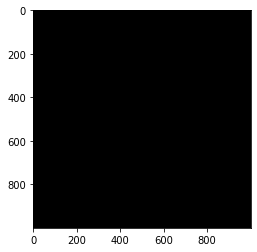

In [31]:
scharrOperator('2.bmp')


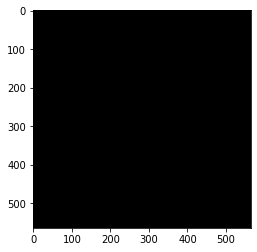

In [36]:
scharrOperator('1.bmp')

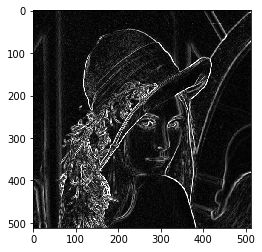

In [22]:
scharrOperator('Lenna.png')

In [ ]:

def timeit(f):
    def wrap(*args):
        time_start = time.time()
        ret = f(*args)
        time_end = time.time()
        print((time_end-time_start)*1000.0)
        return ret
    return wrap
def otsu(image):
    #hist = (np.histogram(image, bins=256)[0])/image.size[0]*image.size[1]
    hist = cv2.calcHist([np.asarray(image)], [0], None, [256], [0, 256])
    bins = np.arange(256)
    hist_norm = hist.ravel() / hist.max()
    Q = np.cumsum(hist_norm)
    fn_min = np.inf
    thresh = -1
    for i in list(range(1, 256)):
        p1, p2 = np.hsplit(hist_norm, [i])  # probabilities
        q1, q2 = Q[i], Q[255] - Q[i]  # cum sum of classes
        if q1 == 0:
            q1 = 0.00000001
        if q2 == 0:
            q2 = 0.00000001
        b1, b2 = np.hsplit(bins, [i])  # weights
        # finding means and variances
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2
        # calculates the minimization function
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
            res_m1,res_m2 = m1,m2
    return thresh

def get_bin_by_tresh(image):
    width = image.size[0]
    height = image.size[1]
    pix = image.load()
    #hist_br = get_hist_br(image)
    treshold = otsu(image)
    new_img = Image.new('1',(width,height))
    draw = ImageDraw.Draw(new_img)
    for x in range(width):
        for y in range(height):
            if pix[x, y] > treshold:
                draw.point((x, y), True)
            else:
                draw.point((x, y), False)
    return new_img

def to_grayscale(image):
    new_img = image.convert('L')
    draw = ImageDraw.Draw(new_img)
    width = new_img.size[0]
    height = new_img.size[1]
    pix = new_img.load()

    for x in range(width):
        for y in range(height):
            r = pix[x, y]
            g = pix[x, y]
            b = pix[x, y]
            av = (b + r + g) // 3
            draw.point((x, y), av)
    return new_img


@timeit


@timeit



In [8]:
from PIL import Image, ImageDraw
import cv
import numpy as np
import time
from threading import Thread
from multiprocessing import Pool, freeze_support
from functools import partial
import math



ModuleNotFoundError: No module named 'cv'

In [5]:
def sobel(img, t):
    img_arr = np.asarray(img)
    new_img = img.copy()
    w = new_img.size[0]
    h = new_img.size[1]
    gx=np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
    gy=np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    r=1
    grad_matrix = np.zeros((h, w))
    draw = ImageDraw.Draw(new_img)
    for y in range(r,h-r):
        for x in range(r,w-r):
            tmp_img = new_img.crop((x-r,y-r,x+r+1,y+r+1))
            arr_pix = np.asarray(tmp_img)
            grad_matrix[y][x] = math.sqrt((np.sum(gx*arr_pix))**2 + (np.sum(gy*arr_pix))**2)
    grad_matrix_norm = grad_matrix * 255 / np.max(grad_matrix)
    for y in range(h):
        for x in range(w):
            draw.point((x, y), 255 if grad_matrix_norm[y][x]>t else 0)
    return new_img



In [6]:
def otsu(image):
    #hist = (np.histogram(image, bins=256)[0])/image.size[0]*image.size[1]
    hist = cv2.calcHist([np.asarray(image)], [0], None, [256], [0, 256])
    bins = np.arange(256)
    hist_norm = hist.ravel() / hist.max()
    Q = np.cumsum(hist_norm)
    fn_min = np.inf
    thresh = -1
    for i in list(range(1, 256)):
        p1, p2 = np.hsplit(hist_norm, [i])  # probabilities
        q1, q2 = Q[i], Q[255] - Q[i]  # cum sum of classes
        if q1 == 0:
            q1 = 0.00000001
        if q2 == 0:
            q2 = 0.00000001
        b1, b2 = np.hsplit(bins, [i])  # weights
        # finding means and variances
        m1, m2 = np.sum(p1 * b1) / q1, np.sum(p2 * b2) / q2
        v1, v2 = np.sum(((b1 - m1) ** 2) * p1) / q1, np.sum(((b2 - m2) ** 2) * p2) / q2
        # calculates the minimization function
        fn = v1 * q1 + v2 * q2
        if fn < fn_min:
            fn_min = fn
            thresh = i
            res_m1,res_m2 = m1,m2
    return thresh

In [6]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    window = [
        (i, j)
        for i in range(-indexer, filter_size-indexer)
        for j in range(-indexer, filter_size-indexer)
    ]
    index = len(window) // 2
    for i in range(len(data)):
        for j in range(len(data[0])):
            data[i][j] = sorted(
                0 if (
                    min(i+a, j+b) < 0
                    or len(data) <= i+a
                    or len(data[0]) <= j+b
                ) else data[i+a][j+b]
                for a, b in window
            )[index]
    return data

In [7]:
def main():
    path_to_img = "binarized-1.bmp"

    image = Image.open(path_to_img)
    #img_arr = np.asarray(image)
    gray_img = image
    gray_img.show()
    pix = gray_img.load()
    width, height = gray_img.size    
    binary=np.zeros(shape=(width,height))
    for x in range(width):
        for y in range(height):
            binary[x,y] = int(pix[x,y][0])
    a=median_filter(binary,5)
    #img_arr_gr = np.asarray(gray_img)
    #bin_img = get_bin_by_tresh(gray_img)
    #bin_path = path_to_img.split('.')[0] + "_bin.bmp"
    #bin_img.save(bin_path,"bmp")
    #bin_img.show()
    #img_arr = np.asarray(bin_img)
    #print(img_arr)
    t=a//3
    #t=(42+28)//2
    res_path = path_to_img.split('.')[0] + "_res_" + str(t)+'.bmp'
    new_image = sobel(gray_img,t)
    new_image.save(res_path, "BMP")
    new_image.show()

main()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()